# C: Libraries

Finally, we will be exploring three of the most popular libraries for data science:
1. [NumPy](#1-numpy) (matrix operations)
2. [Pandas](#2-pandas) (tabular data I/O and operations)
3. [Matplotlib](#3-matplotlib) (plotting and visualisation)

Notes:
- If a line starts with the fountain pen symbol (🖌️), it asks you to implement a code part or
answer a question.
- Lines starting with the light bulb symbol (💡) provide important information or tips and tricks.

## 1. NumPy

[NumPy](https://numpy.org/) is Python's matrix and number operation package ("Numerical Python"). It allows you to work with _n_-dimensional matrices, or arrays; `ndarray`.

In [23]:
import numpy as np

To create an ndarray from a list and print its properties (length, dimensionality, _etc._):

In [ ]:
my_arr = np.array([[1,2,3], [4,5,6]])
print(my_arr)
print(len(my_arr))                      # length of my_arr
print(my_arr.ndim)                      # number of dimensions of my_arr
print(my_arr.shape)                     # shape of my_arr: includes all dimensions

The relationship between dimensionality, shape, and length of ndarrays is shown below:
![numpy arrays](https://predictivehacks.com/wp-content/uploads/2020/08/numpy_arrays-1024x572.png)

You can access arrays via indices, exactly the same as for lists (see above):

In [ ]:
print(my_arr[0])        # first element

print(my_arr[0,2])      # first element in first dimension, third element in second dimension

print(my_arr[1,1:3])    # second element in first dimension, second to fourth in second dimension

print(my_arr[1,1:])     # second element in first dimension, second to remaining in second dim.

print(my_arr[0,:2])     # first element in first dimension, all until second element in second dim.

Advanced ways to create arrays:

In [ ]:
# ndarray with all-zero values of shape 3x4x5:
print(np.zeros((3,4,5)))

# ndarray filled with value 3.4 of shape 2x5x3x1:
print(3.4 * np.ones((2,5,3,1)))

# continuous range of values
print(np.arange(1, 40, 3))              # integers from 1 to 40, in increments of 3

# linearly spaced values
print(np.linspace(0.1, 1.0, 10))        # ten values equally spaced from 0.1 to 1.0

# uniform random values
print(np.random.random((3,2)))

NumPy has a lot of built-in functions to make computations on numbers and ndarrays. We will cover
those in the practicals in more detail. If you want to explore these further, the best resource is
the [official NumPy documentation](https://numpy.org/doc/stable/index.html). For the time being,
here are some examples.

In [ ]:
random_array = np.random.randn(16, 3, 10, 10)       # randn: standard normal random values

print(f'Min:  {random_array.min()}')
print(f'Max:  {random_array.max()}')
print(f'Mean: {random_array.mean()}')
print(f'Sum:  {random_array.sum()}')

# NumPy can apply functions across the entire ndarray or individual numbers
print(f'Standard deviation of sine: {np.std(np.sin(random_array))}')
print(f'Mean square root: {np.sqrt(random_array).mean()}')                          # note warning and output NaN: some of our values are negative...
print(f'Mean square root (where defined): {np.nanmean(np.sqrt(random_array))}')     # np.nanmean calculates the mean of non-NaN values

# matrix multiplication
out = np.matmul(np.random.randn(12, 5), np.random.randn(5, 12))
print(out.shape)

# comparisons
print((random_array > 0).sum())         # all values in random_array greater than zero

----

## 2. Pandas

[Pandas](https://pandas.pydata.org/) is the most popular Python library for handling tabular data.
It provides an interface with data frames similar to R.

![pandas dataframe](https://pynative.com/wp-content/uploads/2021/02/dataframe.png)

Figure: Pandas table, taken from [PyNative blog entry on pandas dataframes](https://pynative.com/python-pandas-dataframe/).

In [2]:
import pandas as pd

### 2.1 Loading tabular data & printing summaries

In [4]:
# load dataframe from file on the internet
iris = pd.read_csv(
    'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
)

In [5]:
# show the first rows of the dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# describe the columns
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# get quick statistics on the column values
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


💡 Note that only numerical columns get summarised. "species" for example is not in the list.

### 2.2 Selecting subsets (rows, columns)

In [ ]:
# select the "species" column
species = iris['species']

In [ ]:
# select multiple columns
petal_data = iris[['petal_width', 'petal_length']]

In [12]:
# select rows by index
first_ten_rows = iris.iloc[:10]

first_ten_rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
# select rows by criterion
valid = iris['sepal_width'] > 3.0

print(f'Out of {len(valid)} rows, {sum(valid)} have a sepal width greater than 3.0')

Out of 150 rows, 67 have sepal width greater than 3.0


In [16]:
# combined criteria
valid = (iris['sepal_width'] > 3.0) * (iris['petal_width'] < 0.2)

print(f'{sum(valid)} rows have sepal width > 3 and petal width < 0.2.')

3 rows have sepal width > 3 and petal width < 0.2.


### 2.3 Conversion

Pandas is an extension of NumPy and conversions back and forth are quite straightforward.

In [ ]:
# convert Pandas dataframe to NumPy array
iris_np = iris.to_numpy()

print(iris_np.shape)
print(iris_np[:5,:])

(150, 5)
[[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']]


In [ ]:
# create Pandas dataframe from NumPy array
pd.DataFrame(iris_np,
             columns=('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 2.4 Saving Pandas dataframe to file

Pandas dataframes can be loaded from and saved to many different formats (see [here](https://pandas.pydata.org/docs/reference/io.html) for all of them).

In [ ]:
iris.to_csv('iris.csv')             # CSV
iris.to_csv('iris.dsv', sep='\t')   # Tab-separated

----

## 3. Matplotlib

Finally, we will be using [Matplotlib](https://matplotlib.org/) to visualise images, charts, plots,
_etc._.

In [21]:
import matplotlib.pyplot as plt

### 3.1 Simple plots

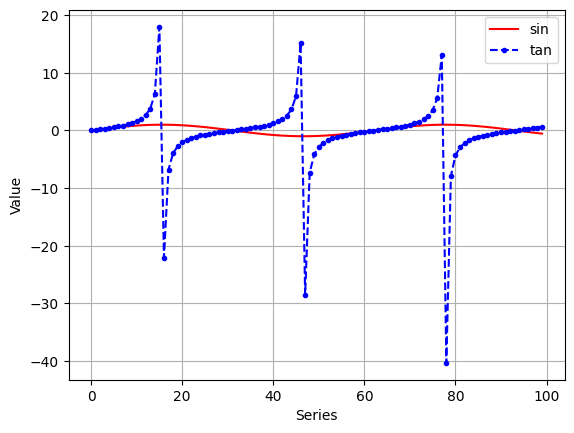

In [27]:
plt.figure()

x_vals = np.linspace(0, 10, 100)

plt.plot(np.sin(x_vals), 'r-', label='sin')
plt.plot(np.tan(x_vals), 'b--.', label='tan')
plt.xlabel('Series')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.show()

💡 The [plot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.plot.html) function accepts
many arguments. Above, we've provided y values, a format specifier consisting of colour (`r`: red,
`b`: blue) and line format (`-`: solid line, `--.`: dash-dash-dotted line), and label (shown in plot
with `plt.legend()` command).

### 3.2 Scatter plots

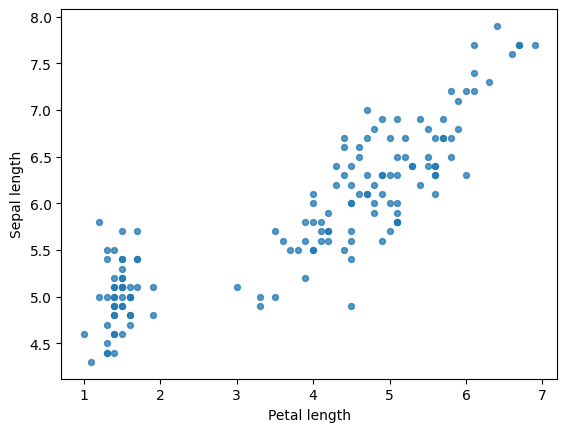

In [28]:
plt.figure()

plt.scatter(iris['petal_length'],
            iris['sepal_length'],
            s=18,
            alpha=0.75)
plt.xlabel('Petal length')
plt.ylabel('Sepal length')
plt.show()

💡 Also [scatter](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.scatter.html) can be
customised in many ways. Above, we've provided x, y, point size (`s`) and opacity (`alpha`).

### 3.3 Matrices, rasters, images

<Figure size 640x480 with 0 Axes>

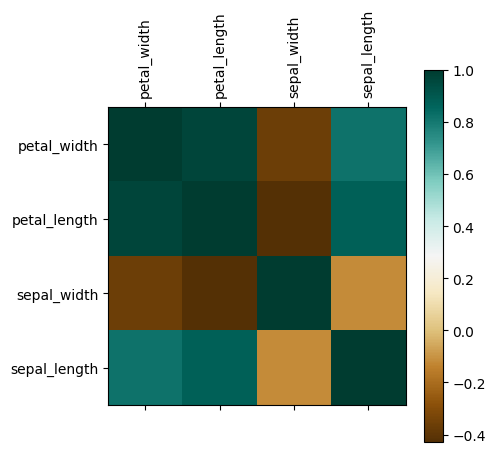

In [56]:
var_names = ['petal_width', 'petal_length', 'sepal_width', 'sepal_length']

# Pandas has a built-in correlation analysis function, returning a matrix of coefficients
correlations = iris[var_names].corr()

# let us visualise that matrix now
plt.figure()
plt.matshow(correlations, cmap='BrBG')
plt.xticks(range(len(var_names)), var_names, rotation=90)
plt.yticks(range(len(var_names)), var_names)
plt.colorbar()
plt.show()

💡
- Command `matshow` displays matrices. For images, use `imshow`.
- Argument `cmap='BrBG'` assigned a colour map, diverging from brown to blue-green. See [here](https://matplotlib.org/stable/gallery/color/colormap_reference.html) for available colour maps.

### 3.3 Other plots

As you would expect, Matplotlib allows you to create many other types of plots as well:

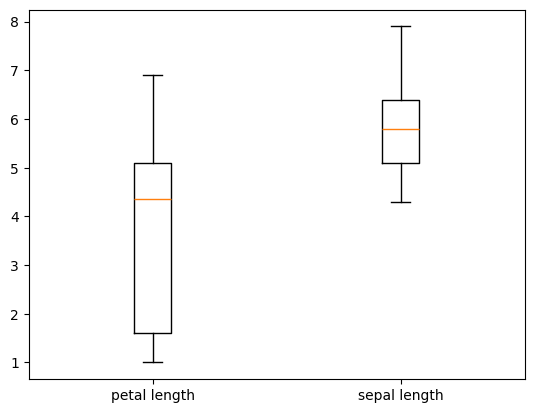

In [33]:
# boxplots
plt.figure()
plt.boxplot(iris[['petal_length', 'sepal_length']])
plt.xticks([1, 2], ['petal length', 'sepal length'])
plt.show()

💡 Note how two boxplots have been drawn. This is because our input consists of two columns; Matplotlib will automatically treat each column as a series to draw.

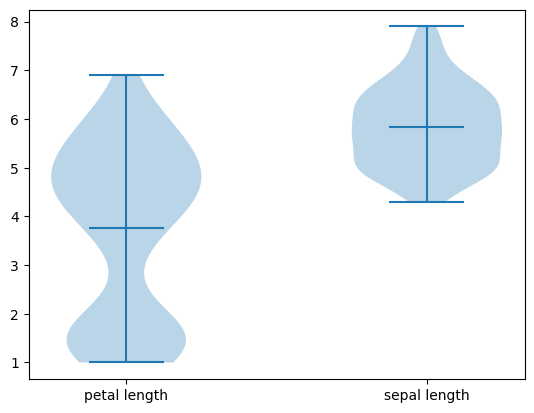

In [32]:
# the same, as violin plots
plt.figure()
plt.violinplot(iris[['petal_length', 'sepal_length']],
               showmeans=True)
plt.xticks([1, 2], ['petal length', 'sepal length'])
plt.show()

### 3.4 Saving figures

To save a figure, add a line as follows **before** calling `plt.show()`:

In [ ]:
plt.savefig('my_figure.pdf')

## 4. Conclusion

We have looked a little bit into three of the most common data I/O libraries for Python. They each offer a lot more functionality, we will see some of that in the course.
Together, they provide the foundation for many more advanced tools and software packages, such as the following:
- Machine learning: [Scikit-learn](https://scikit-learn.org/)
- Deep learning: [PyTorch](https://pytorch.org/)
- Statistical models: [Statsmodels](https://www.statsmodels.org/stable/index.html) (general statistical models); [PyStan](https://pystan.readthedocs.io/en/latest/) and [PyMC3](https://www.pymc.io/welcome.html) (Bayesian inference)
- Image manipulation: [Pillow](https://pillow.readthedocs.io/en/stable/), [Scikit-Image](https://scikit-image.org/), [Torchvision](https://pytorch.org/vision/stable/index.html)
- Audio manipulation: [Librosa](https://librosa.org/doc/latest/index.html), [Torchaudio](https://pytorch.org/audio/)
- Geospatial data (vector): [Geopandas](https://geopandas.org/en/stable/), [Shapely](https://shapely.readthedocs.io/en/stable/manual.html), [Fiona](https://fiona.readthedocs.io/)
- Geospatial data (raster): [Rasterio](https://rasterio.readthedocs.io/)